<a href="https://colab.research.google.com/github/SuheirJammal/Drug_Type_Prediction/blob/main/Drug_Type_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import basic libraries
import pandas as pd
import numpy as np
#to remove warnings
import warnings

## Load the Data

In [ ]:
file_path = "/content/drive/MyDrive/AXSOSACADEMY/02-IntroML/Belt_Exam_ML(1)/Belt2_A_drugtype_v2_final.csv"
df_drugs = pd.read_csv(file_path)
df_drugs.info()
df_drugs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          237 non-null    float64
 1   Gender       296 non-null    object 
 2   BP           221 non-null    object 
 3   Cholesterol  296 non-null    object 
 4   Na_to_K      296 non-null    object 
 5   Drug         296 non-null    object 
dtypes: float64(1), object(5)
memory usage: 14.0+ KB


,Age,Gender,BP,Cholesterol,Na_to_K,Drug
0,59.0,M,High,HIGH,13.935,drugQ
1,40.0,F,Normal,HIGH,10.103,drugZ
2,NaN,M,Normal,HIGH,9.084,drugZ
3,62.0,M,Normal,HIGH,16.594,drugZ
4,55.0,F,High,NORMAL,10.977,drugQ


In [ ]:
#rename unobvious column names
df_drugs = df_drugs.rename(columns={'BP':'Blood_Pressure',
                                    'Na_to_K': 'Sodium_to_Potassium'})
df_drugs

,Age,Gender,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Drug
0,59.0,M,High,HIGH,13.935,drugQ
1,40.0,F,Normal,HIGH,10.103,drugZ
2,NaN,M,Normal,HIGH,9.084,drugZ
3,62.0,M,Normal,HIGH,16.594,drugZ
4,55.0,F,High,NORMAL,10.977,drugQ
...,...,...,...,...,...,...
291,44.0,F,High,HIGH,12.854,drugQ
292,NaN,F,Normal,HIGH,10.065,drugZ
293,49.0,M,Low,NORMAL,11.014,drugZ
294,29.0,F,High,NORMAL,9.475,drugQ


# Clean the Data

In [ ]:
df_drugs['Gender'].dtype

dtype('O')

In [ ]:
def inspect_each_feature_for_cleaning(df):
  for col in df:
    print('*' * 50)
    print(col)
    print('*' * 50)

    print(f'Data Type: {df[col].dtype}')
    print(f'# of nulls: {df[col].isna().sum()}' )
    print(f"nunique: {df[col].nunique()}")
    print(f'value counts: {df[col].value_counts(dropna=False)}')
    if col in df.select_dtypes(include='number').columns:
      print(f"Min value: {df[col].min()}")
      print(f"Max value: {df[col].max()}")

    print("\n")

In [ ]:
inspect_each_feature_for_cleaning(df_drugs)

**************************************************
Age
**************************************************
Data Type: float64
# of nulls: 59
nunique: 59
value counts: Age
NaN      59
36.0      9
61.0      7
55.0      7
32.0      7
43.0      7
42.0      7
39.0      6
31.0      6
69.0      6
60.0      6
37.0      6
70.0      6
23.0      6
28.0      6
26.0      6
67.0      6
53.0      6
57.0      5
29.0      5
49.0      5
19.0      5
59.0      5
44.0      5
48.0      5
20.0      4
56.0      4
40.0      4
24.0      4
65.0      4
47.0      4
50.0      4
45.0      4
58.0      4
74.0      3
54.0      3
35.0      3
62.0      3
73.0      3
66.0      3
18.0      3
72.0      3
22.0      3
46.0      2
64.0      2
52.0      2
21.0      2
38.0      2
34.0      2
16.0      2
15.0      2
71.0      2
51.0      2
41.0      2
30.0      2
63.0      1
25.0      1
33.0      1
570.0     1
68.0      1
Name: count, dtype: int64
Min value: 15.0
Max value: 570.0


*************************************************

### Age

In [ ]:
# 570.0 is not a valid age
df_drugs[df_drugs['Age'] == 570]

,Age,Gender,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Drug
232,570.0,F,Normal,HIGH,14.216,drugZ


In [ ]:
#replace the value with NaN
df_drugs['Age'] = df_drugs['Age'].replace(570, np.nan)

In [ ]:
df_drugs.loc[232]

,232
Age,NaN
Gender,F
Blood_Pressure,Normal
Cholesterol,HIGH
Sodium_to_Potassium,14.216
Drug,drugZ


### Gender

In [ ]:
#Based on the data dictionary we should have only two values M for males and f for females
df_drugs['Gender'] = df_drugs['Gender'].replace({'male': 'M',
                                                 'female':'F',
                                                 'Female':'F',
                                                  'Male':'M',
                                                  'femal':'F',
                                                  'Femal':'F'})

In [ ]:
df_drugs['Gender'].value_counts()

,count
Gender,
M,154
F,142


### Cholesterol

In [ ]:
#based on the data dictionary we should have oly two values HIGH and NORMAL
df_drugs['Cholesterol'] = df_drugs['Cholesterol'].replace({'norm': 'NORMAL',
                                                           'high': 'HIGH',
                                                           'NORM': 'NORMAL'})


In [ ]:
df_drugs['Cholesterol'].value_counts()

,count
Cholesterol,
HIGH,164
NORMAL,132


### Sodium_to_Potassium

In [ ]:
#first remove any non numeric characters
df_drugs['Sodium_to_Potassium'] = df_drugs['Sodium_to_Potassium'].str.replace('10.403_', '10.403')

In [ ]:
#the values in this feature are floats so we should convert the datatype from object to float
df_drugs['Sodium_to_Potassium'] = df_drugs['Sodium_to_Potassium'].astype(float)

In [ ]:
df_drugs['Sodium_to_Potassium'].dtype

dtype('float64')

## Check for Duplicates

In [ ]:
#check the number of duplicates
df_drugs.duplicated().sum()

np.int64(15)

In [ ]:
#inspect the duplicates with first occurence
#df_drugs[df_drugs.duplicated(keep=False)].sort_values(by=['Age', 'Gender', 'Blood_Pressure', 'Cholesterol', 'Sodium_to_Potassium',
 #      'Drug'])
df_drugs[df_drugs.duplicated(keep=False)].sort_values(by=[*df_drugs.columns])

,Age,Gender,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Drug
127,19.0,F,High,HIGH,12.307,drugQ
220,19.0,F,High,HIGH,12.307,drugQ
26,29.0,M,High,HIGH,9.664,drugQ
142,29.0,M,High,HIGH,9.664,drugQ
67,36.0,F,High,HIGH,13.091,drugQ
265,36.0,F,High,HIGH,13.091,drugQ
159,43.0,M,Low,HIGH,15.376,drugZ
246,43.0,M,Low,HIGH,15.376,drugZ
201,44.0,F,High,HIGH,12.854,drugQ
291,44.0,F,High,HIGH,12.854,drugQ


In [ ]:
#drop duplicates
df_drugs = df_drugs.drop_duplicates()

In [ ]:
#check if all duplicates are deleted
df_drugs.duplicated().sum()

np.int64(0)

In [ ]:
df_drugs['Drug'].value_counts()

,count
Drug,
drugZ,147
drugQ,134


# EDA

## Handling Missing Values

- Made a copy of the cleaned dataframe before imputing in order to avoid data leakage when modeling

In [ ]:
df_copy = df_drugs.copy()

- The missing values in the age column were imputed using the median, as it provides a more robust and realistic estimate than the mean, especially when the data may contain outliers or be skewed.

In [ ]:
df_copy['Age'] = df_copy['Age'].fillna(df_copy['Age'].median())

In [ ]:
df_copy['Age'].isna().sum()

np.int64(0)

- Missing values in the blood pressure column were filled with the label 'missing' to allow further investigation into the possible reasons for their absence.

In [ ]:
df_copy['Blood_Pressure'] = df_copy['Blood_Pressure'].fillna('Missing')

In [ ]:
df_copy['Blood_Pressure'].value_counts()

,count
Blood_Pressure,
High,128
Missing,75
Normal,46
Low,32


## Custom Visualization Functions

In [ ]:
# Basic imports for functions
import matplotlib.pyplot as plt
import seaborn as sns

# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):


  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes



def plot_categorical_vs_target(df, x, y,figsize=(6,4),
                            fillna = True, placeholder = 'MISSING', target_type = 'reg',
                            order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])

  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

  #REGRESSION TARGET PLOT
  if target_type == 'reg':
  # Barplot
    sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
    sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)

  #CATEGORICAL TARGET PLOT
  else:
    sns.histplot(data = temp_df, x=x, hue=y, stat='percent', multiple='fill' , ax=ax)

  # Rotate xlabels
  ax.set_xticks(ax.get_xticks()) # added this to prevet a bug
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y, figsize=(6, 4),
                           target_type='reg', estimator='mean',
                           errorbars='ci', sorted=False, ascending=False,
                           **kwargs):  # **kwargs for sns.regplot

    # Handle missing values
    nulls = df[[x, y]].isna().sum()
    if nulls.sum() > 0:
        print(f"Excluding {nulls.sum()} NaN's")
        temp_df = df.dropna(subset=[x, y])
    else:
        temp_df = df

    # Create the figure
    fig, ax = plt.subplots(figsize=figsize)

    # REGRESSION-TARGET PLOT
    if 'reg' in target_type:
        # Calculate the correlation
        corr = df[[x, y]].corr().round(2)
        r = corr.loc[x, y]

        # Plot the data
        scatter_kws = {'ec': 'white', 'alpha': 0.8}
        sns.regplot(data=temp_df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs)

        # Add title with correlation
        ax.set_title(f"{x} vs. {y} (r = {r})")

    # CLASSIFICATION-TARGET PLOT
    elif 'class' in target_type:
        # Sort the groups by median/mean
        if sorted is True:
            if estimator == 'median':
                group_vals = temp_df.groupby(y)[x].median()
            elif estimator == 'mean':
                group_vals = temp_df.groupby(y)[x].mean()

            # Sort values
            group_vals = group_vals.sort_values(ascending=ascending)
            order = group_vals.index
        else:
            order = None

        # Barplot
        sns.barplot(data=temp_df, x=y, y=x, order=order,
                    estimator=estimator, errorbar=errorbars, ax=ax, **kwargs)

        # Add title
        ax.set_title(f"{x} vs. {y}")

    # Rotate x labels for readability
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    fig.tight_layout()
    fig.show()
    return fig, ax

## EDA - Explaratory Data Analysis

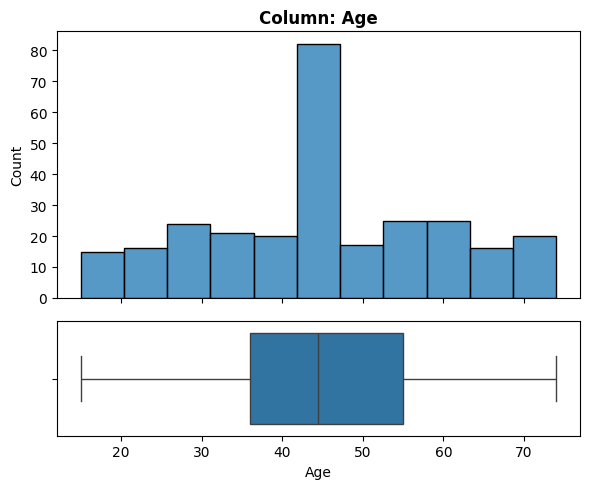

- NaN's Found: 0 (0.0%)
- Unique Values: 59
- Most common value: '44.5' occurs 55 times (19.57%)
- Not constant or quasi-constant.


In [ ]:
# used df_drugs to see the distribution of age before imputation
explore_numeric(df_copy, 'Age')
warnings.filterwarnings('ignore')

- This graph highlights the distrubtion of patients' ages in the dataset
- 50% of patients are between 36 and 55 years old
- The middle value of ages is around 44.5
- We have patients from different ages

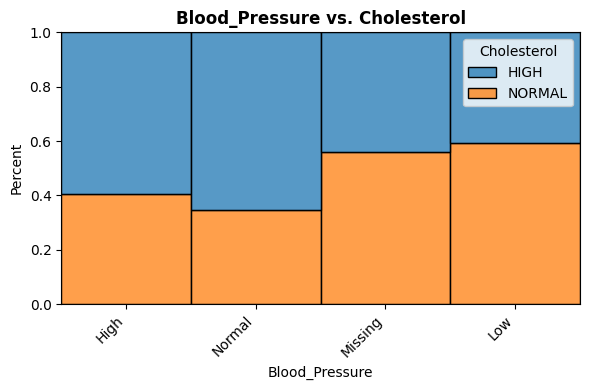

In [ ]:
plot_categorical_vs_target(df_copy,'Blood_Pressure', 'Cholesterol', fillna=False, target_type='class')
warnings.filterwarnings('ignore')

- There is a positive relationship between BP and Cholesterol
- There is a visible trend: as blood pressure decreases, the proportion of people with normal cholesterol increases.
- The “missing” category behaves somewhat like the low BP category — this might be useful to explore further (e.g., are missing BP values associated with healthier profiles?).

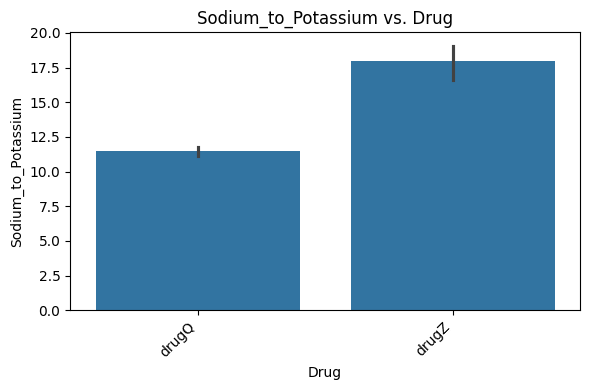

In [ ]:
plot_numeric_vs_target(df_copy,'Sodium_to_Potassium', 'Drug', target_type='class')
warnings.filterwarnings('ignore')

- The mean Sodium-to-Potassium ratio is about 17.5 for patients using DrugZ
- The mean Sodium-to-Potassium ratio is about 11 for patients using DrugQ
- This means that DrugZ is generally prescribed or more effective for patients who have higher Sodium-to-Potassium levels.





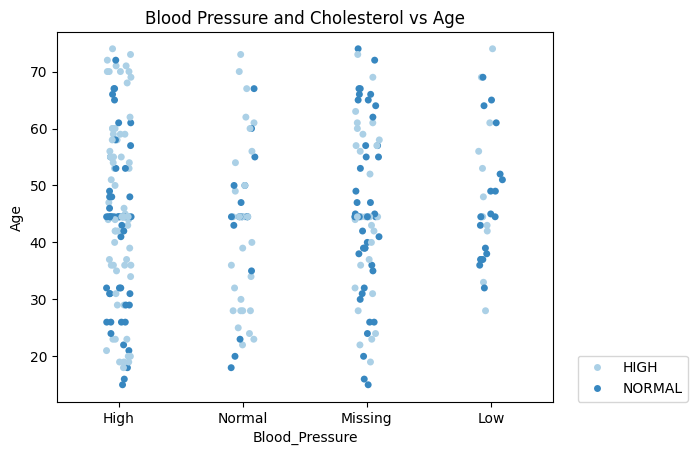

In [ ]:
#plot_categorical_vs_target(df_copy,'Blood_Pressure', 'Age')
ax = sns.stripplot(df_copy, x = 'Blood_Pressure', y ='Age', hue= 'Cholesterol', palette= 'Blues')
ax.set_title('Blood Pressure and Cholesterol vs Age')
ax.legend(loc=(1.05, 0))
warnings.filterwarnings('ignore')

- Patients with higher blood pressure tend to also show higher cholesterol levels, especially in older age groups (30 and above)
- Meanwhile, those with normal or low blood pressure exhibit a more balanced or lower cholesterol distribution.

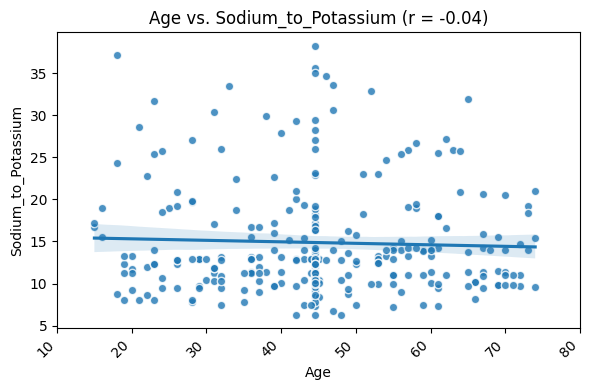

In [ ]:
plot_numeric_vs_target(df_copy, x= 'Age', y = 'Sodium_to_Potassium')
warnings.filterwarnings('ignore')

- There is no meaningful relationship between a patient’s age and their Sodium-to-Potassium ratio.
- The very low correlation (r = -0.04) indicates that age does not play a significant role in influencing the Sodium-to-Potassium ratio.

# Preparation for Modeling

## Bussiness Case

- **Goal**: recommend the best drug for at-risk patients.
- **positive class(1)** -> DrugQ -> is **critical** and missing it could **harm** the patient
- **negative class(0)** -> DrugZ
- What **metric** do you think would be **important**?
  - **Recall** is the most important metric in this case because it focuses on **minimizing missing life-saving treatments** (false negatives). In the context of drug selection, false negative means failing to identify an at risk patient who actually needs the drug which is **more harmful than** giving the drug to a few who may not need it

In [ ]:
target = 'Drug'
X = df_drugs.drop(columns=target)
y = df_drugs[target].replace({'drugZ': 0,
                          'drugQ': 1})

## Split the Data

In [ ]:
#import modeling packages
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
#stratify: the split will maintain the same proportion of classes in both sets.

In [ ]:
#check the class balance
y_train.value_counts(normalize=True)

,proportion
Drug,
0,0.52381
1,0.47619


- Our target is almost balanced

## Preprcessing

In [ ]:
#import prerocessing packages
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config
set_config(transform_output='pandas')

#### Numeric Features

- Imputed numeric feature with median, as it provides a more robust and realistic estimate than the mean, and scaled them because the models used require scaling, as they use the sum of different features

In [ ]:
#imputing and scaling numeric features
num_cols = X_train.select_dtypes(include='number').columns
#instantiate the simple imputer
num_imputer = SimpleImputer(strategy='median')
#instantiate the scaler
scaler = StandardScaler()
#instantiate pipeline for numeric
num_pipe = make_pipeline(num_imputer, scaler)
#define tuple for numeric features
num_tuple = ('numeric', num_pipe, num_cols)

#### Ordinal Features

- Cholesterol values: High/Normal represent levels of cholestrol
- Blood Pressure values: Low/high/normal also show a meaningful order
- imputed missing values of Blood Pressure with 'Missing' contant
- encoded both features ordinaly as they show an order
- scaled them due to modeling's necessity

In [ ]:
df_drugs['Cholesterol'].value_counts(dropna=False)

,count
Cholesterol,
HIGH,152
NORMAL,129


In [ ]:
df_drugs['Blood_Pressure'].value_counts(dropna=False)

,count
Blood_Pressure,
High,128
NaN,75
Normal,46
Low,32


In [ ]:
ord_cols = ['Cholesterol', 'Blood_Pressure']
#instantiate the simple imputer
ord_imputer = SimpleImputer(strategy='constant', fill_value='Missing')
#define the Cholesterol's values' order
Chol_order = ['NORMAL', 'HIGH']
#define the BP's values' order
BP_order = ['Missing','Low','Normal', 'High']
#instantiate the OrdinalEncoder
ord_encoder = OrdinalEncoder(categories=[Chol_order, BP_order])
#instantiate pipeline for numeric
ord_pipe = make_pipeline(ord_imputer,ord_encoder ,scaler)
#define tuple for numeric features
ord_tuple = ('ordinal', ord_pipe, ord_cols)

#### Nominal Features

- needed no imputation, since there are no missing values
- One hot encoded, as male and female represent only categorical groups with no order

In [ ]:
cat_cols = ['Gender']
#define tuple and instantiate one hot encoder for categorical features
cat_tuple = ('categorical', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_cols)

In [ ]:
#instantiate the preprocessor
preprocessor = ColumnTransformer([num_tuple, ord_tuple, cat_tuple], n_jobs=-1, verbose_feature_names_out=False)

# ML Models

## Custom Evaluation Functions

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
def classification_metrics(y_true, y_pred, label= '', output_dict=False, figsize = (8,4), normalize='true', cmap = 'Blues', colorbar = False):

  header = '-' * 70

  #get the classification report as a string
  report = classification_report(y_true, y_pred)

  #print the header and report
  print(header, f"Classification Metrics: {label}", header, sep="\n")
  print (report)


  #print heatmaps of the confusion matrices
  fig, ax = plt.subplots(ncols=2, figsize=figsize)

  #create a confusion matrix with raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred, ax = ax[0], normalize=None, cmap='gist_gray', colorbar= colorbar)
  ax[0].set_title('Raw Counts')

  #create a confusion matrix with normalize
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred, ax = ax[1], normalize=normalize, cmap=cmap, colorbar= colorbar)
  ax[1].set_title('Normalized Confusion Matrix')

  fig.tight_layout()
  plt.show()

  if output_dict:
    report = classification_report(y_true, y_pred, output_dict=True)
    return report

In [ ]:
def evaluate_classification(model, X_train, y_train, X_test, y_test, figsize = (6, 4), normalize='true', cmap_train = 'Blues', cmap_test='Reds',output_dict=False, colorbar = False):

  y_train_pred = model.predict(X_train)
  train_report = classification_metrics(y_train, y_train_pred, label = 'Training Data', figsize=figsize, normalize=normalize, cmap=cmap_train, output_dict=output_dict, colorbar=colorbar)

  y_test_pred = model.predict(X_test)
  test_report =  classification_metrics(y_test, y_test_pred, label = 'Testing Data',figsize=figsize, normalize=normalize, cmap=cmap_test, colorbar=colorbar, output_dict=output_dict)

  if output_dict:
    result = { 'train' : train_report,
                'test' : test_report}
    return result



## Default Logistic Regression

- Why did you choose logistic regression?
  - classification problem
  - easy to interpret
  - model training and predictions are relatively fast
  - no tuning is needed unless you need to regularize your model(reduce overfitting)

In [ ]:
from sklearn.linear_model import LogisticRegression
#instantiate the default LogisticRegression model
log_reg = LogisticRegression(random_state=42)
#instantiate model pipeline
log_reg_pipeline = make_pipeline(preprocessor, log_reg)
#fit model pipeline
log_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Sodium_to_Potassium'], dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['NORMAL',
                                                                                               'HIGH'],
                                                                                              ['Missing',
                                                                                               'Low',
                                                                                               'Normal',
                                                                                               'High']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Cholesterol',
                                                   'Blood_Pressure']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender'])],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression(random_state=42))])

### Prediction and Evaluation

----------------------------------------------------------------------
Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       110
           1       0.78      0.81      0.79       100

    accuracy                           0.80       210
   macro avg       0.80      0.80      0.80       210
weighted avg       0.80      0.80      0.80       210



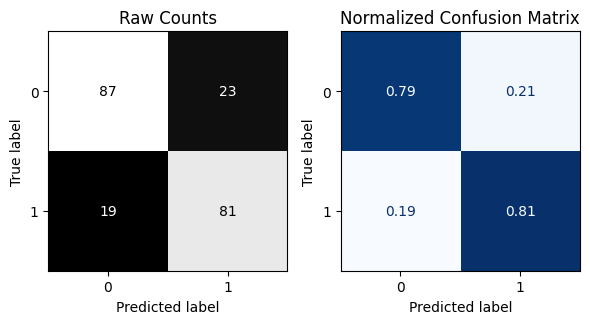

----------------------------------------------------------------------
Classification Metrics: Testing Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.59      0.67        37
           1       0.64      0.79      0.71        34

    accuracy                           0.69        71
   macro avg       0.70      0.69      0.69        71
weighted avg       0.70      0.69      0.69        71



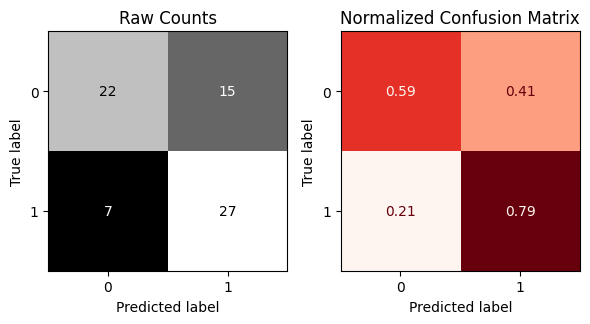

In [ ]:
evaluate_classification(log_reg_pipeline, X_train, y_train, X_test, y_test)

- **Overfitting**: performance on training is better than testing.
  - accuracy is 80% on training and 69% on testing.
  - f1_score (harmonic avg) is also 80% on training and 69% on testing.
- **Recall is 79% on DrugQ** (class 1) in testing: which is the ratio of the **actual at risk patients** that the model identified -> good percentage.
- Precision is 64% on  DrugQ (class 1) in testing: which is the ratio of the predicted risk patients that are actually at risk.
- **Regularization is needed to reduce overfitting and to increase recall on the class 1, as missing a life-saving treatment (False Negative) is worse than prescribing a slightly less needed drug (False Positive).**


## Tuned Logistic Regression

In [ ]:

# Define parameter dictionaries for each penalty type
# -----------------------------------------

# Params compatible with penalty='elasticnet'
elasticnet_params = {
    'logisticregression__solver': ['saga'],
    'logisticregression__penalty': ['elasticnet'],
    'logisticregression__l1_ratio': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'logisticregression__class_weight': [None, 'balanced']
}

# Params compatible with penalty='l2'
l2_params = {
    'logisticregression__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'logisticregression__penalty': ['l2'],
    'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'logisticregression__class_weight': [None, 'balanced']
}

# Params compatible with penalty='l1'
l1_params = {
    'logisticregression__solver': ['liblinear', 'saga'],
    'logisticregression__penalty': ['l1'],
    'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'logisticregression__class_weight': [None, 'balanced']
}

# Combine all parameter grids
param_grid = [l2_params, l1_params, elasticnet_params]

# Instantiate and run GridSearchCV
gs = GridSearchCV(
    log_reg_pipeline, param_grid,
    verbose=5, n_jobs=-1, cv=3,
    scoring='recall_macro'
)

gs.fit(X_train, y_train)



Fitting 3 folds for each of 150 candidates, totalling 450 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Age', 'Sodium_to_Potassium'], dtype='object')),
                                                                        ('ordinal',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='Miss...
                          'logisticregression__class_weight': [None,
                                                               'balanced'],
                          'logisticregression__penalty': ['l1'],
                          'logisticregression__solver': ['liblinear', 'saga']},
                         {'logisticregression__class_weight': [None,
                                                               'balanced'],
                          'logisticregression__l1_ratio': [0.0, 0.1, 0.2, 0.3,
                                                           0.4, 0.5, 0.6, 0.7,
                                                           0.8, 0.9, 1],
                          'logisticregression__penalty': ['elasticnet'],
                          'logisticregression__solver': ['saga']}],
             scoring='recall_macro', verbose=5)

### Prediction and Evaluation

----------------------------------------------------------------------
Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       110
           1       0.79      0.84      0.81       100

    accuracy                           0.81       210
   macro avg       0.81      0.82      0.81       210
weighted avg       0.82      0.81      0.81       210



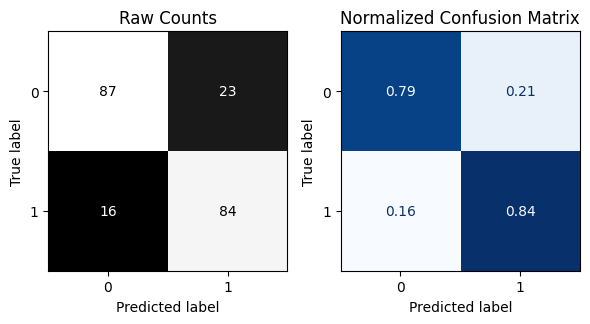

----------------------------------------------------------------------
Classification Metrics: Testing Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.57      0.66        37
           1       0.64      0.82      0.72        34

    accuracy                           0.69        71
   macro avg       0.71      0.70      0.69        71
weighted avg       0.71      0.69      0.69        71



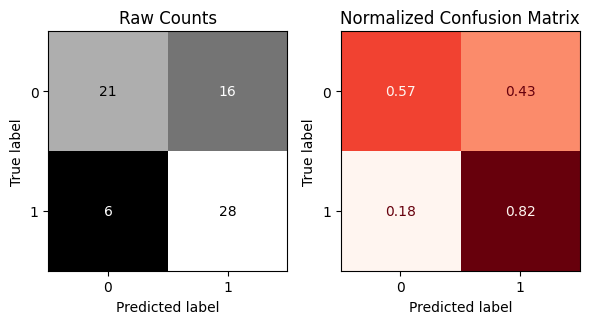

In [ ]:
evaluate_classification(gs.best_estimator_, X_train, y_train, X_test, y_test)

In [ ]:
gs.best_params_

{'logisticregression__C': 10,
 'logisticregression__class_weight': 'balanced',
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'lbfgs'}

- **Overfitting**: performance on training is better than testing.
  - accuracy is 81% on training and 69% on testing.
  - f1_score (harmonic avg) is also 81% on training and 69% on testing.
- **Recall is 82% on DrugQ** (class 1) in testing: which is the ratio of the **actual at risk patients** that the model identified -> good percentage.
- Precision is 64% on  DrugQ (class 1) in testing: which is the ratio of the predicted risk patients that are actually at risk.
- succeeded in improving the recall


## Default Random Forest

- Why did you choose random forest?
  - Good Generalization Performance
  - Feature Importance Insights
  - Reduces overfitting by averaging results.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#instantiate random forest classifier and pipeline
random_forest_pipe = make_pipeline(preprocessor, RandomForestClassifier(random_state =42))
#fit the pipe on the training data
random_forest_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Sodium_to_Potassium'], dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  (...coder',
                                                                   OrdinalEncoder(categories=[['NORMAL',
                                                                                               'HIGH'],
                                                                                              ['Missing',
                                                                                               'Low',
                                                                                               'Normal',
                                                                                               'High']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Cholesterol',
                                                   'Blood_Pressure']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender'])],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

### Prediction and Evaluation

----------------------------------------------------------------------
Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       100

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



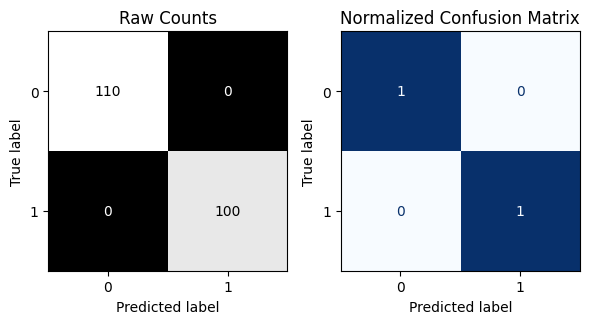

----------------------------------------------------------------------
Classification Metrics: Testing Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.84      0.90        37
           1       0.85      0.97      0.90        34

    accuracy                           0.90        71
   macro avg       0.91      0.90      0.90        71
weighted avg       0.91      0.90      0.90        71



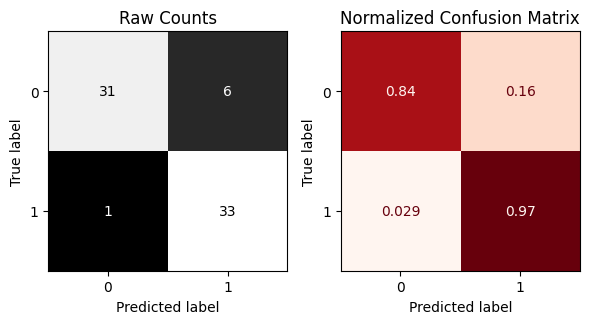

In [ ]:
evaluate_classification(random_forest_pipe,X_train, y_train, X_test, y_test)

- **Overfitting**: performance on training is better than testing.
  - accuracy is 100% on training and 90% on testing.
  - f1_score (harmonic avg) is also 100% on training and 90% on testing.
- **Recall is 97% on DrugQ** (class 1) in testing: which is the ratio of the **actual at risk patients** that the model identified -> good percentage.
- Precision is 85% on  DrugQ (class 1) in testing: which is the ratio of the predicted risk patients that are actually at risk.
- succeeded in improving the recall


## Tuned Random Forest

In [ ]:
params = {'randomforestclassifier__class_weight': [None, 'balanced'],
          'randomforestclassifier__n_estimators': [5, 7, 9, 11, 13, 15],
          'randomforestclassifier__max_depth': [None, 3, 4],
          'randomforestclassifier__min_samples_leaf': [1, 2, 3]}

In [ ]:
gs_random = GridSearchCV(random_forest_pipe, params, n_jobs=-1, cv= 5, scoring='recall_macro')
gs_random.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Age', 'Sodium_to_Potassium'], dtype='object')),
                                                                        ('ordinal',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='Miss...
                                                          verbose_feature_names_out=False)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__class_weight': [None,
                                                                  'balanced'],
                         'randomforestclassifier__max_depth': [None, 3, 4],
                         'randomforestclassifier__min_samples_leaf': [1, 2, 3],
                         'randomforestclassifier__n_estimators': [5, 7, 9, 11,
                                                                  13, 15]},
             scoring='recall_macro')

In [ ]:
gs_random.best_params_

{'randomforestclassifier__class_weight': None,
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__min_samples_leaf': 2,
 'randomforestclassifier__n_estimators': 11}

### Prediction and Evaluation

----------------------------------------------------------------------
Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       110
           1       1.00      0.99      0.99       100

    accuracy                           1.00       210
   macro avg       1.00      0.99      1.00       210
weighted avg       1.00      1.00      1.00       210



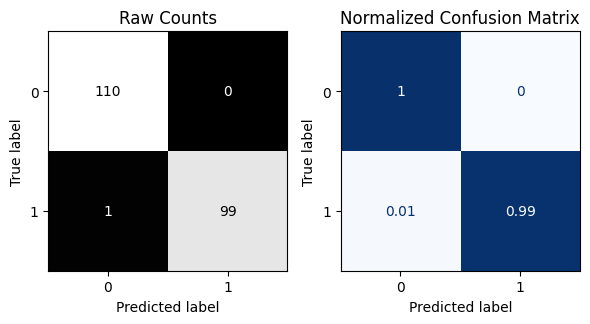

----------------------------------------------------------------------
Classification Metrics: Testing Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        37
           1       0.81      1.00      0.89        34

    accuracy                           0.89        71
   macro avg       0.90      0.89      0.89        71
weighted avg       0.91      0.89      0.89        71



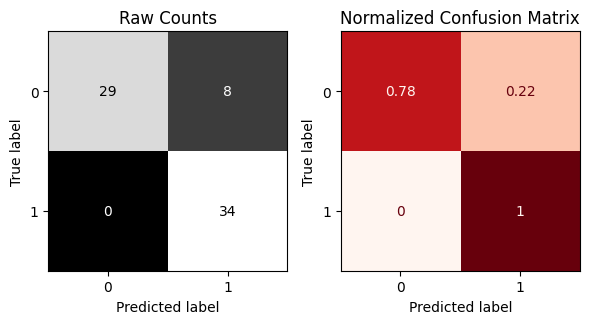

In [ ]:
evaluate_classification(gs_random.best_estimator_,X_train, y_train, X_test, y_test)

- **Overfitting**: performance on training is better than testing.
  - accuracy is 100% on training and 89% on testing.
  - f1_score (harmonic avg) is also 100% on training and 89% on testing.
- **Recall is 100% on DrugQ in testing** (class 1): which is the ratio of the **actual at risk patients** that the model identified -> good percentage.
- Precision is 81% on  DrugQ (class 1) in testing: which is the ratio of the predicted risk patients that are actually at risk.
- succeeded in improving the recall


# Final Evaluation

- Which model would you recommend for production?
  - Recommended Model: **Tuned Random Forest**
  
  - **Recall**(Test Data): 100% — the highest among all  models.

  - Precision(Test Data): 81% — very good **recall-precision tradeoff.**

  - **Macro Recall**(Test Data): 89% — almost best average recall across all classes - very close to default random forest which is 90% on testing

- Which metrics did you use to decide, and why?
  - Recall is the most important metric in this business case because it focuses on **minimizing missing life-saving treatments **(false negatives). In the context of drug selection, false negative means failing to identify an at risk patient who actually needs the drug which is more harmful than giving the drug to a few who may not need it

  - A high recall ensures that the model identifies as many at risk cases as possible in order to minimize false negatives, because failing to detect life-threatening cases would lead to a serious consequence.

  - Predicting positive when there isn’t one (false positive) is less harmful than missing an actual case. Therefore, the focus is on maximizing recall, even if it slightly lowers precision.
  
  
